In [1]:
%%capture
!wget https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt

In [2]:
import pandas as pd

# Define the embedding data
data = {
    "Word": ["king", "queen", "man", "woman", "apple", "banana", "city", "village", "car", "bus"],
    "Masculine": [0.95, 0.10, 0.98, 0.05, 0.00, 0.00, 0.20, 0.20, 0.30, 0.30],
    "Feminine": [0.05, 0.90, 0.02, 0.95, 0.00, 0.00, 0.20, 0.20, 0.30, 0.30],
    "Royalty": [0.98, 0.97, 0.10, 0.10, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    "Food": [0.00, 0.00, 0.00, 0.00, 0.95, 0.90, 0.00, 0.00, 0.00, 0.00],
    "Sweetness": [0.00, 0.00, 0.00, 0.00, 0.90, 0.85, 0.00, 0.00, 0.00, 0.00],
    "Urban": [0.30, 0.30, 0.40, 0.40, 0.10, 0.10, 0.95, 0.60, 0.60, 0.60],
    "Transport": [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.10, 0.10, 0.95, 0.90],
    "Size": [0.80, 0.75, 0.70, 0.68, 0.20, 0.25, 0.85, 0.40, 0.55, 0.75]
}

# Create the DataFrame
embedding_df = pd.DataFrame(data)

# Display the DataFrame
embedding_df

,Word,Masculine,Feminine,Royalty,Food,Sweetness,Urban,Transport,Size
0,king,0.95,0.05,0.98,0.00,0.00,0.30,0.00,0.80
1,queen,0.10,0.90,0.97,0.00,0.00,0.30,0.00,0.75
2,man,0.98,0.02,0.10,0.00,0.00,0.40,0.00,0.70
3,woman,0.05,0.95,0.10,0.00,0.00,0.40,0.00,0.68
4,apple,0.00,0.00,0.00,0.95,0.90,0.10,0.00,0.20
5,banana,0.00,0.00,0.00,0.90,0.85,0.10,0.00,0.25
6,city,0.20,0.20,0.00,0.00,0.00,0.95,0.10,0.85
7,village,0.20,0.20,0.00,0.00,0.00,0.60,0.10,0.40
8,car,0.30,0.30,0.00,0.00,0.00,0.60,0.95,0.55
9,bus,0.30,0.30,0.00,0.00,0.00,0.60,0.90,0.75


In [3]:
import numpy as np

In [4]:
v1 = embedding_df.iloc[0, 1:].to_numpy()
v2 = embedding_df.iloc[2, 1:].to_numpy()

np.linalg.norm(v1 - v2)

np.float64(0.8923003978481686)

In [5]:
v1 = embedding_df.iloc[0, 1:].to_numpy()
v2 = embedding_df.iloc[5, 1:].to_numpy()

np.linalg.norm(v1 - v2)

np.float64(1.9340113753543438)

In [6]:
import torch
import torch.nn.functional as F

In [7]:
torch.randint(0, 100, (10,))

tensor([ 6, 80,  7, 92, 39, 15, 20, 50, 94, 70])

In [8]:
m = 8
torch.randn(10, m)

tensor([[-0.9474,  0.5127,  0.8046,  1.8097,  0.1764, -0.9085,  3.3541,  0.2393],
        [-0.3767, -1.9446, -0.4578, -0.5101, -0.2775,  0.2969,  0.1090,  0.1262],
        [-0.7843,  1.2339, -0.1197, -0.5225,  1.3123, -0.0717,  0.5265,  0.5589],
        [-1.1563, -0.1576, -1.0133,  0.8831,  0.8334, -0.3904, -0.6116,  0.5135],
        [ 1.0180,  0.3167,  0.4578,  0.6775,  0.8262,  0.8562,  0.8164,  0.7670],
        [ 0.3102, -0.7241, -0.4003, -0.1552,  0.6076, -0.9286, -0.1102, -0.5682],
        [ 1.7744, -0.6899,  0.4712, -0.3196,  0.3708, -0.3008,  1.6152,  0.2564],
        [-0.6293,  1.7906, -0.5147, -0.4243, -1.1094, -0.3670,  0.1134,  1.6498],
        [-1.3496,  0.9344, -1.0650,  0.0984, -0.6286,  0.1934,  1.1191, -1.0490],
        [-0.3991, -1.6187,  0.7050,  0.7138, -0.1804, -1.0262, -1.0963,  0.1414]])

In [9]:
names = open('names.txt').read().splitlines()
vocab = sorted(set(''.join(names) + '.'))
stoi = {v:k for k, v in enumerate(vocab)}
itos = {v:k for k, v in stoi.items()}

def decode(seq: list[int]) -> str:
    return ''.join([itos[i] for i in seq])

def encode(name: str) -> list[int]:
    return [stoi[s] for s in name]

In [10]:
block_size = 3

X = []
Y = []

for name in names:
    context = [0] * block_size
    for ch in name + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(f"{context} -> {ix}")
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [11]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [12]:
vocab_size = 27
block_size = 3
n_embd = 4
n_hidden = 50

C = torch.randn(vocab_size, n_embd, requires_grad=True)
W1 = torch.randn(block_size * n_embd, n_hidden, requires_grad=True)
b1 = torch.randn(n_hidden, requires_grad=True)
W2 = torch.randn(n_hidden, vocab_size, requires_grad=True)
b2 = torch.randn(vocab_size, requires_grad=True)

W3 = torch.randn(block_size * n_embd, vocab_size, requires_grad=True)

params = [C, W1, b1, W2, b2, W3]

In [13]:
# This entire block must be in a loop
# forward pass
xenc = C[X]
x_emb = xenc.view(xenc.size(0), -1)
h_preact = x_emb @ W1 + b1
h = torch.tanh(h_preact)
logits = h @ W2 + b2 + x_emb @ W3

# loss
loss = F.cross_entropy(logits, Y)

# zero grad

loss.backward()

# update params

Hometask

gpt prompt: "help me learn this notebook, and implement it from scratch myself
and finish feed forwarrd and backward in for loop epoches process to train neural model and evaluate, generate new names
i am following bengio's paper"

In [16]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 4060 Laptop GPU'

Bengio's idea: "we might have sentence "dog is walking" during training, but not "cat was sleeping" so with n-grams 2nd gets zero probability bengio says those are similar , so also should get high probs thats why we describe words or tokens as continuos vectors in embeddings, and close words will be located closer in vector space"


model:


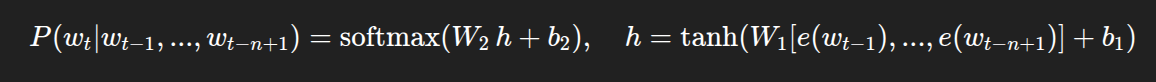

e m m a
e(embeddings) + m(embeddings) + m(embeddings) -> a(embeddings)
concatenate embeddings -> keeps positional information -> first linear layer learns weights for each position in the context
if not concatenate but sum or avg -> "cat" identical "tac"

2. dataset prep

stoi → string to index (encoder)
itos → index to string (decoder)

X: (N, 3)
Y: (N,)  # 1-D tensor